In [1]:
import numpy as np
import qutip as q
import matplotlib.pyplot as plt
import astropy.units as u
import astropy.constants as c
from math import factorial
import scipy.linalg as lin

In [2]:
sub_t = 350*u.um #substrate thickness (Si in this case)
metal_t = 250*u.nm #Deposited metal thickness (Al)
Sc = 67*u.fF/(u.um)**2 #JJ specific capacitance
epsilon = 11.45
W_jj = 200*u.nm #junction width
phi0 = c.h/2/c.e.si
T = 30*u.mK

In [3]:
def get_qubit_Es(Cq,Lj):
    Ec = (c.e.si**2/2/Cq).to(u.J)
    Ej = ((phi0/2/np.pi)**2/Lj).to(u.J)
    return (Ec, Ej)
    

In [ ]:
def calc_freqs(C2):
    C1 = 115*u.fF
    Cg = 0.6*u.fF

    C_mat = np.array([[C1.value+Cg.value,-Cg.value],[-Cg.value, C2.value+Cg.value]])
    C_mat_inv = lin.inv(C_mat)
    C_mat_inv /= u.fF
    Ec1 = (c.e.si**2/2*C_mat_inv[0,0]/c.hbar).to(u.GHz).value
    Ec2 = (c.e.si**2/2*C_mat_inv[1,1]/c.hbar).to(u.GHz).value
    Ecg = (c.e.si**2/2*C_mat_inv[1,0]/c.hbar).to(u.GHz).value


    Lj = 13*u.nH
    Ej = ((phi0/2/np.pi)**2/Lj/c.hbar).to(u.GHz).value
    Ej1 = Ej
    Ej2 = Ej

    # Ecg = 0*u.J
    # Ecg = (c.e.si**2/2/Cg).to(u.J)

    nz1 = 1j/2*(Ej1/2/Ec1)**(1/4)
    nz2 = 1j/2*(Ej2/2/Ec2)**(1/4)

    pz1 = (2*Ec1/Ej1)**(1/4)
    pz2 = (2*Ec2/Ej2)**(1/4)

In [149]:
C1 = 115*u.fF
# C2 = 115*u.fF
C2 = 80*u.fF
# Cg = 0*u.fF
Cg = .6*u.fF

C_mat = np.array([[C1.value+Cg.value,-Cg.value],[-Cg.value, C2.value+Cg.value]])
C_mat_inv = lin.inv(C_mat)
C_mat_inv /= u.fF
Ec1 = (c.e.si**2/2*C_mat_inv[0,0]/c.hbar).to(u.GHz).value
Ec2 = (c.e.si**2/2*C_mat_inv[1,1]/c.hbar).to(u.GHz).value
Ecg = (c.e.si**2/2*C_mat_inv[1,0]/c.hbar).to(u.GHz).value


Lj = 13*u.nH
Ej = ((phi0/2/np.pi)**2/Lj/c.hbar).to(u.GHz).value
Ej1 = Ej
Ej2 = Ej

# Ecg = 0*u.J
# Ecg = (c.e.si**2/2/Cg).to(u.J)

nz1 = 1j/2*(Ej1/2/Ec1)**(1/4)
nz2 = 1j/2*(Ej2/2/Ec2)**(1/4)

pz1 = (2*Ec1/Ej1)**(1/4)
pz2 = (2*Ec2/Ej2)**(1/4)


In [150]:
# print(Ej1, Ej2)
print(Ec1, Ec2)
print(nz1, nz2)
print(C_mat_inv)

1.0528671533031475 1.5100675300476905
1.237462704251317j 1.13077557895179j
[[8.65085328e-03 6.43984115e-05]
 [6.43984115e-05 1.24074273e-02]] 1 / fF


In [151]:
N = 10
# I1 = q.Qobj([[1,0],[0,0]])
# I2 = q.Qobj([[0,0],[0,1]])
I = q.qeye(N)
# Id1 = np.array(q.tensor(I2, I))
# Id2 = np.array(q.tensor(I1, I))

In [152]:
qc1 = q.tensor(I, q.create(N))
qd1 = q.tensor(I, q.destroy(N))
qc2 = q.tensor(q.create(N),I)
qd2 = q.tensor(q.destroy(N),I)

In [153]:
n1 = nz1*(qc1-qd1)
n2 = nz2*(qc2-qd2)

phi1 = pz1*(qc1+qd1)
phi2 = pz2*(qc2+qd2)

In [154]:
H1 = (4*Ec1*n1*n1
      +1/2*Ej1*phi1*phi1
      -1/factorial(4)*Ej1*(phi1*phi1)*(phi1*phi1))
H2 = 4*Ec2*n2*n2+1/2*Ej2*phi2*phi2-1/factorial(4)*Ej2*(phi2*phi2)*(phi2*phi2)
H_int = 4*Ecg/2*(n1*n2+n2*n1)

In [155]:
H_tot = H1+H2+H_int

In [156]:
h = np.array(H_tot)

In [157]:
eig, vec = lin.eigh(h)

In [158]:
eig  = eig**(1/2)

In [159]:
eig

array([ 5.2597574 ,  7.23205816,  7.54041876,  8.69629779,  9.02744864,
        9.16751886,  9.85602121, 10.23804853, 10.38024087, 10.4252592 ,
       10.52891809, 10.83345426, 11.0012069 , 11.23980963, 11.42607085,
       11.48851272, 11.50705852, 11.83429462, 11.86911084, 12.06916334,
       12.10604413, 12.39013106, 12.45720702, 12.47925508, 12.49982188,
       12.66015416, 12.93194005, 12.99953837, 13.04099184, 13.18106397,
       13.23641879, 13.31265891, 13.3612742 , 13.59849857, 13.6174114 ,
       13.6872538 , 13.80231312, 13.81835002, 14.0430909 , 14.05333915,
       14.13643833, 14.1434086 , 14.29052687, 14.43065991, 14.51635814,
       14.54680375, 14.5814011 , 14.62027012, 14.69784153, 14.71527219,
       14.8405612 , 14.86547459, 14.93852193, 15.15790415, 15.30482774,
       15.37303714, 15.51306058, 15.51737035, 15.6035503 , 15.61205183,
       15.61298195, 15.63599547, 15.64202537, 15.79917025, 15.8109192 ,
       16.07480124, 16.09772572, 16.24728061, 16.27574861, 16.34

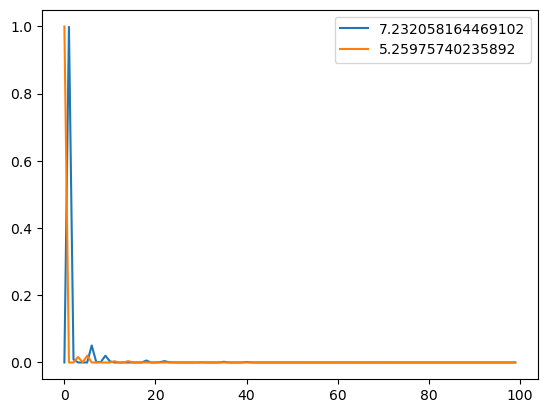

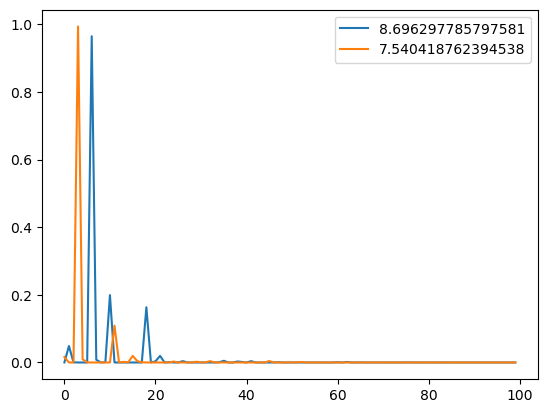

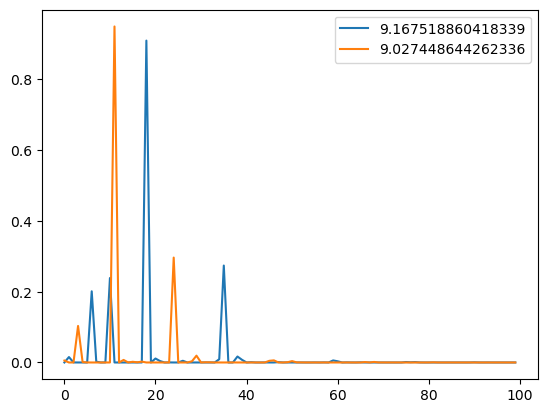

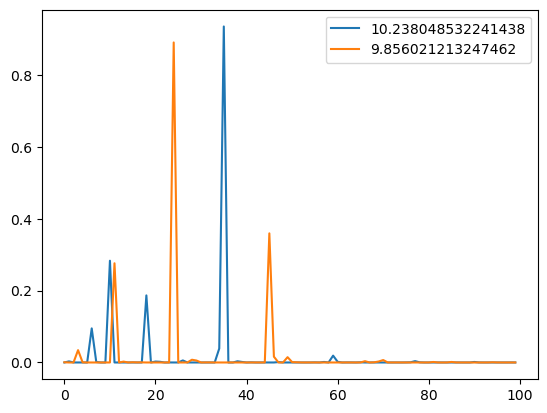

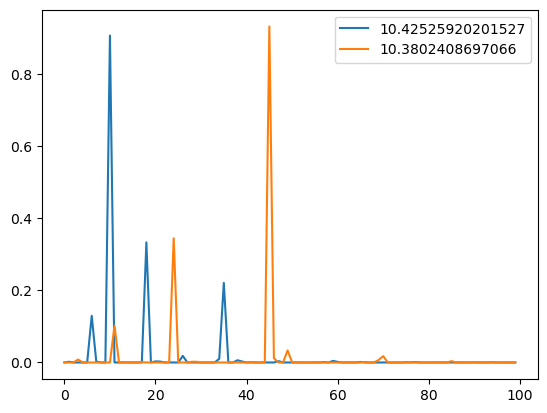

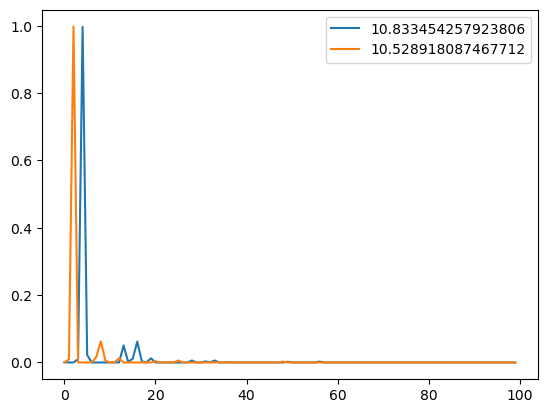

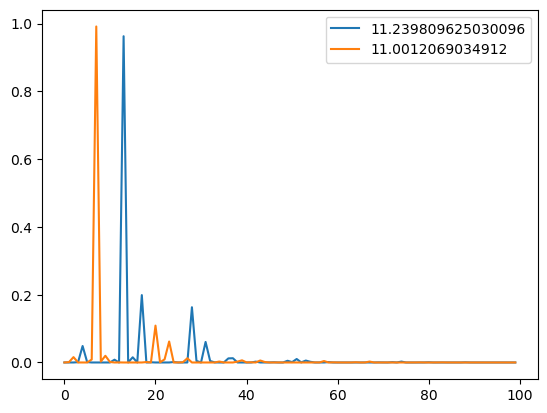

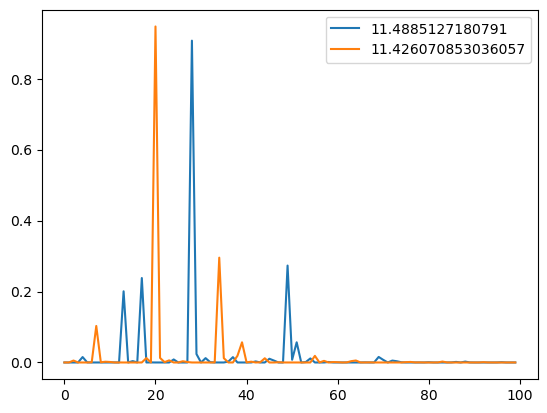

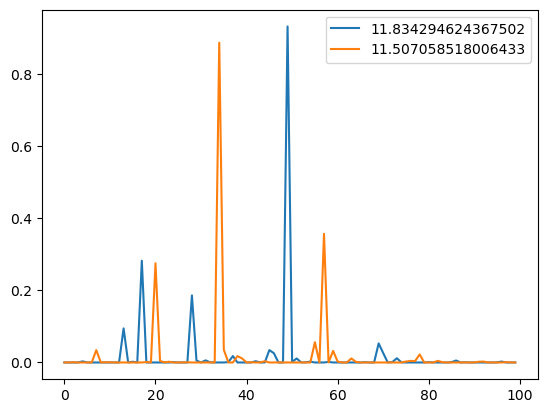

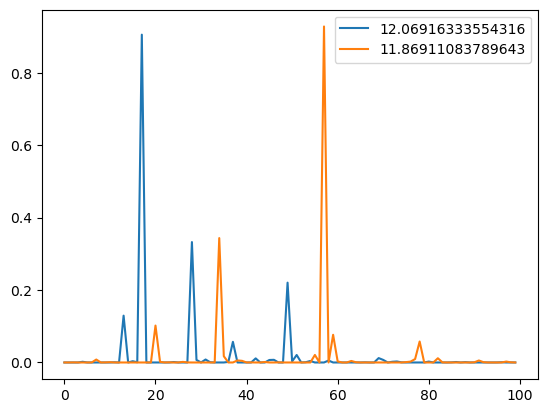

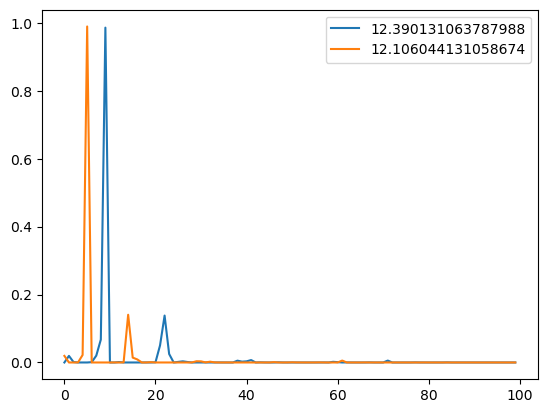

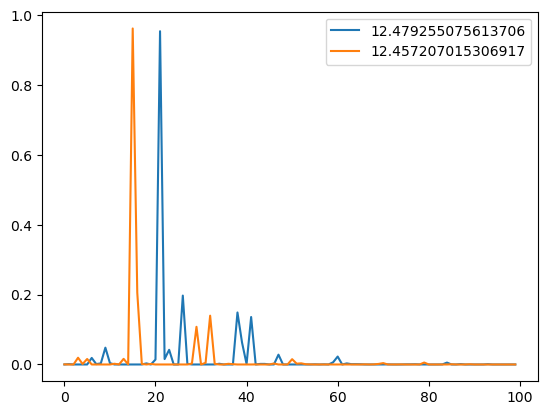

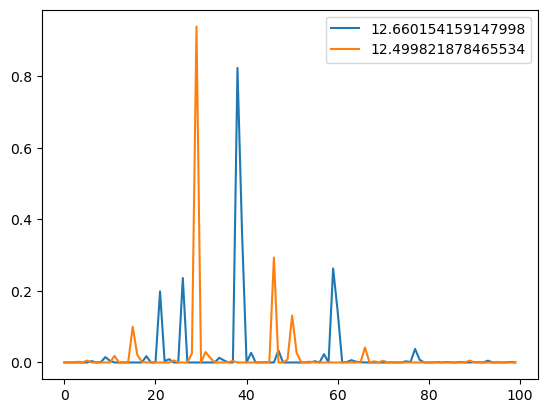

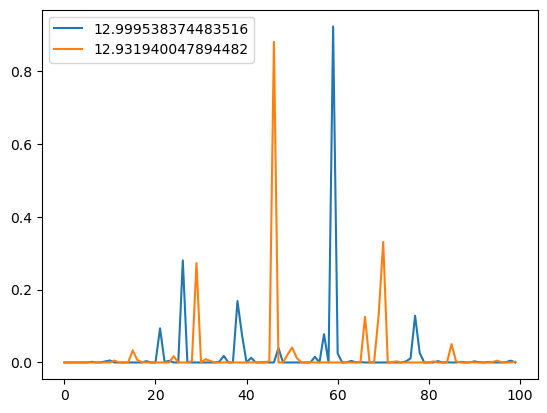

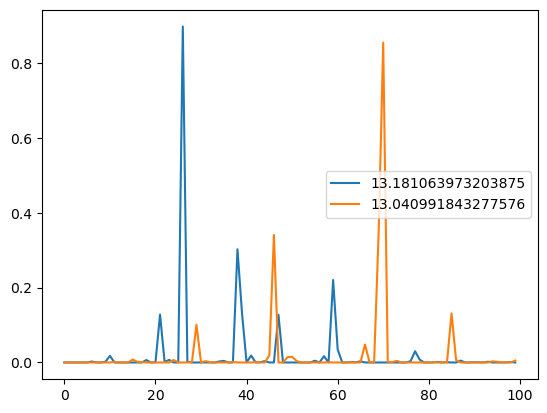

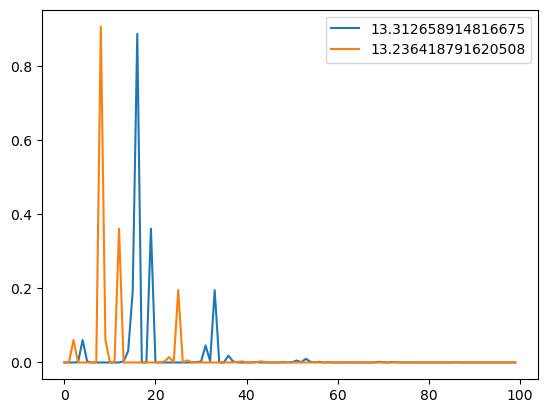

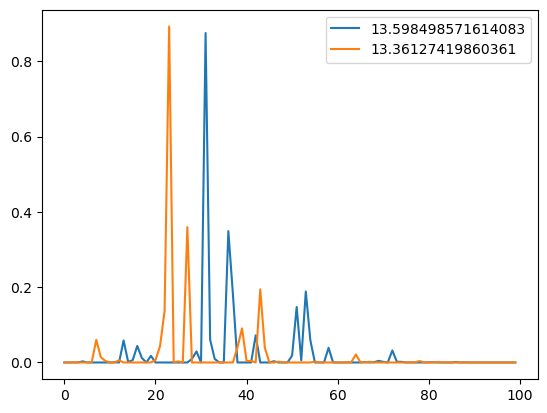

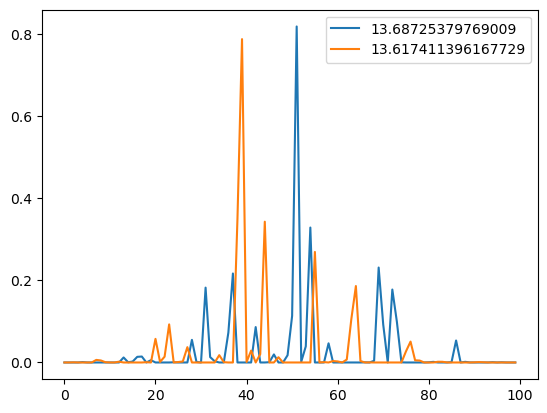

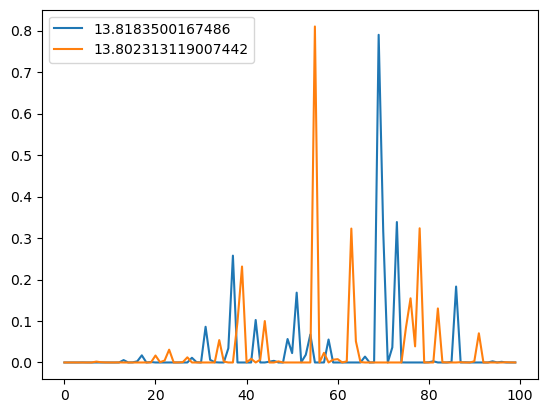

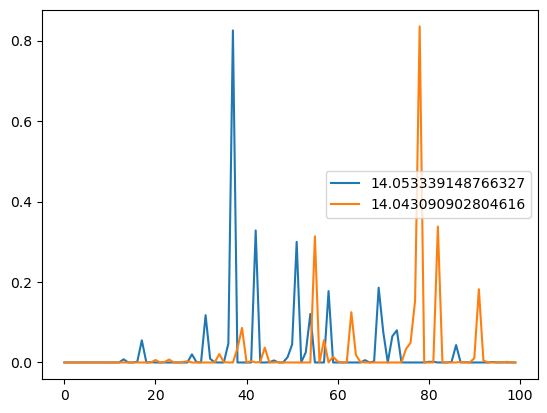

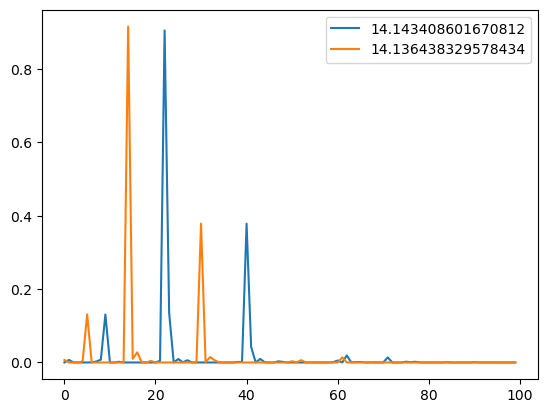

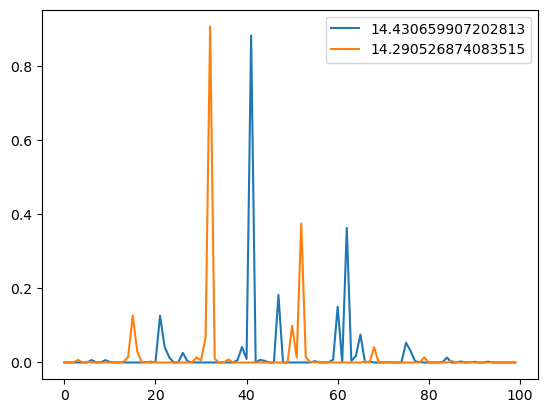

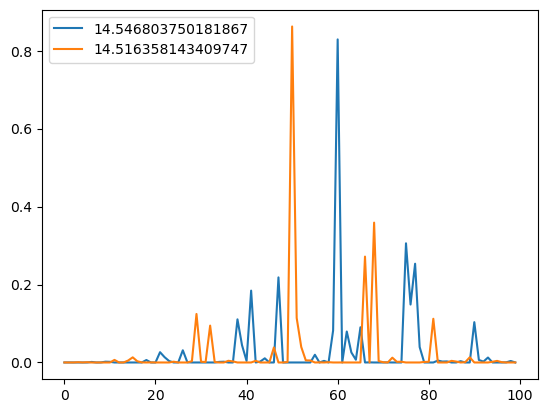

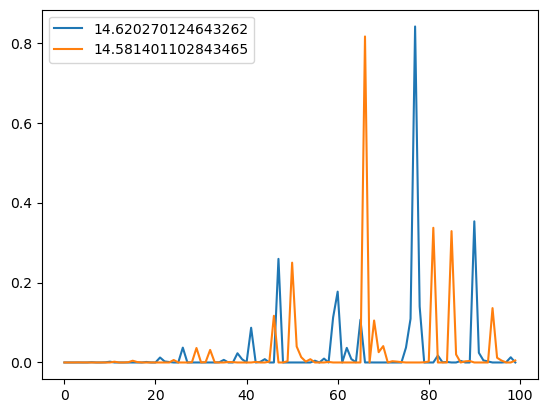

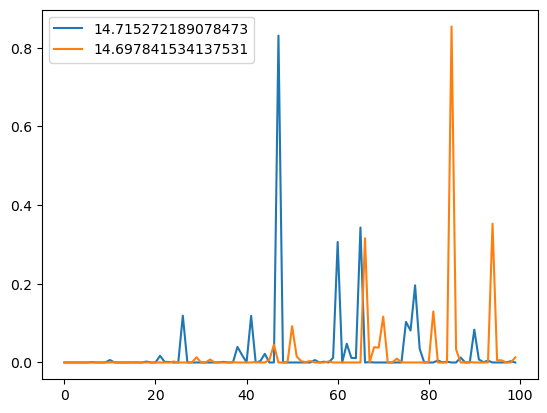

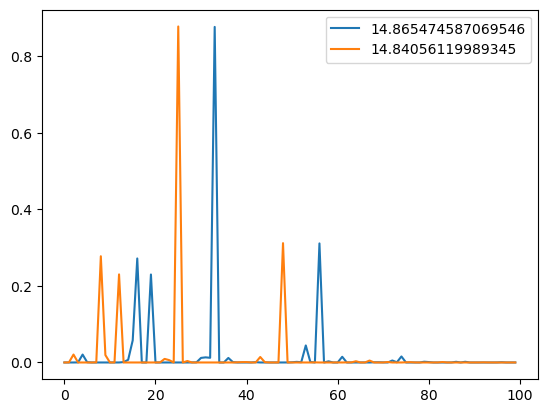

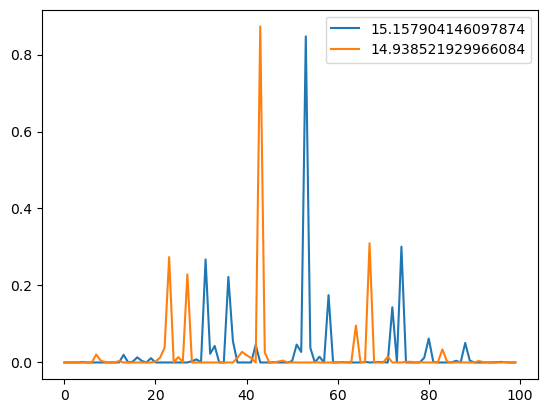

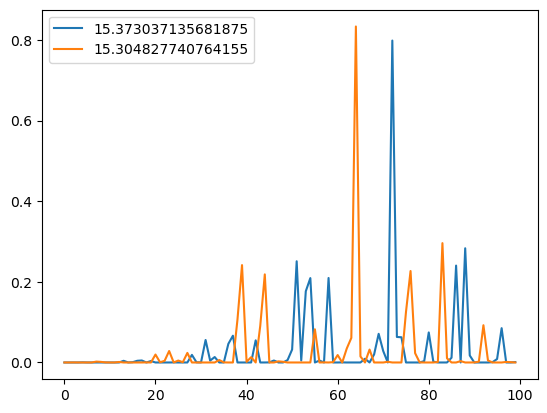

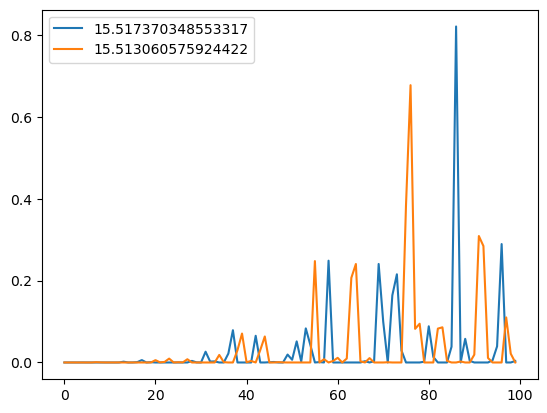

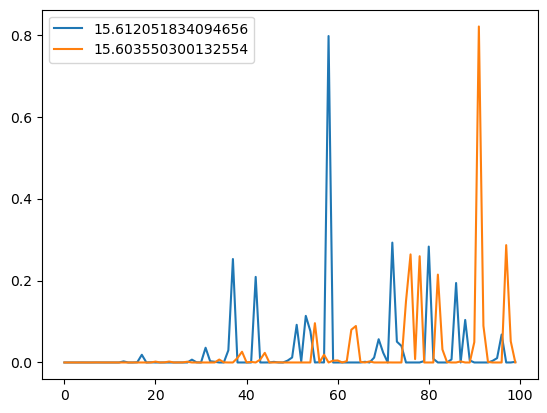

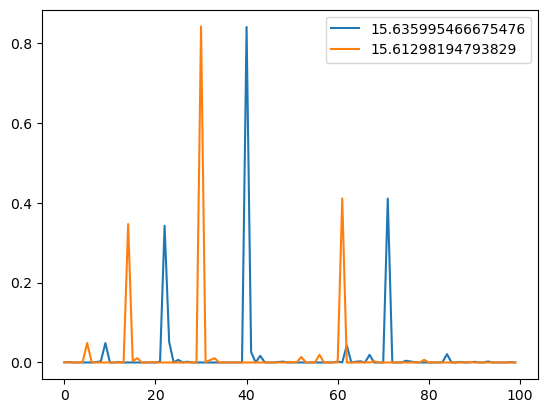

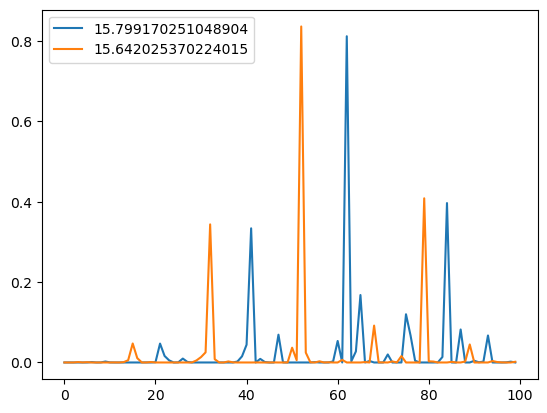

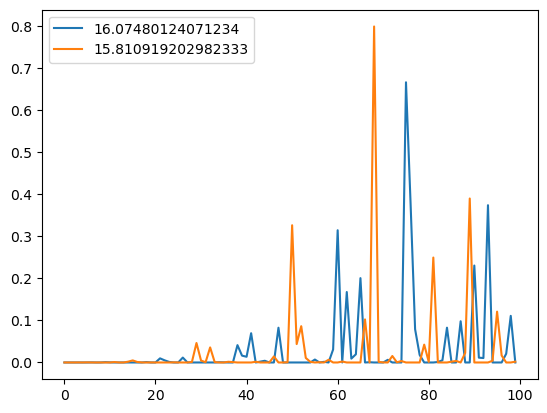

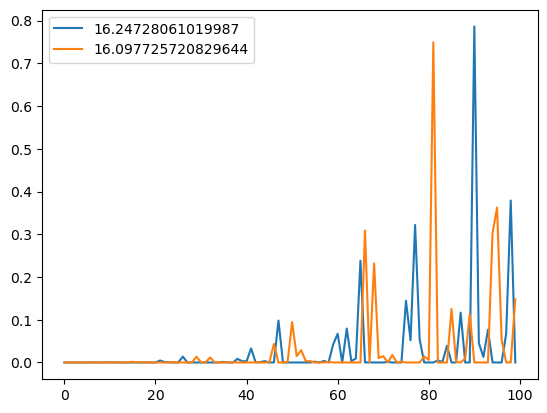

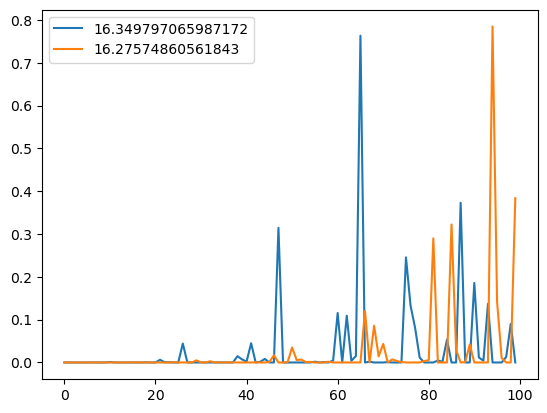

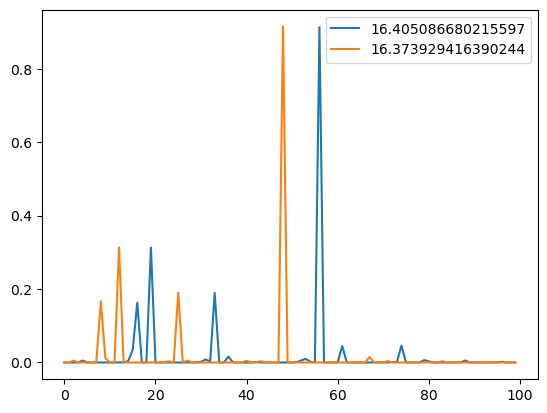

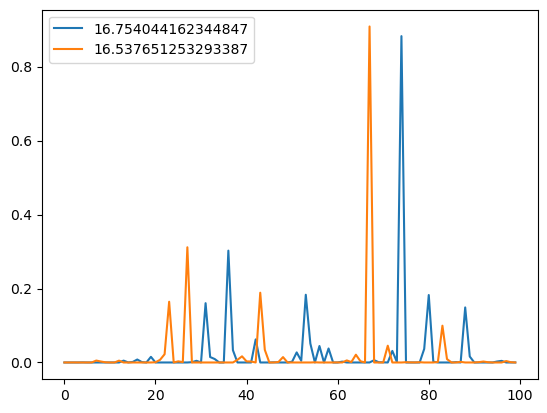

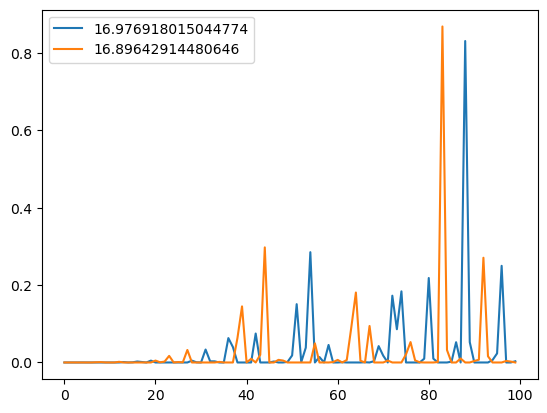

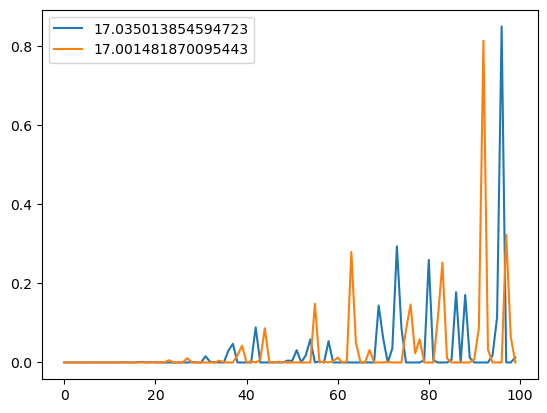

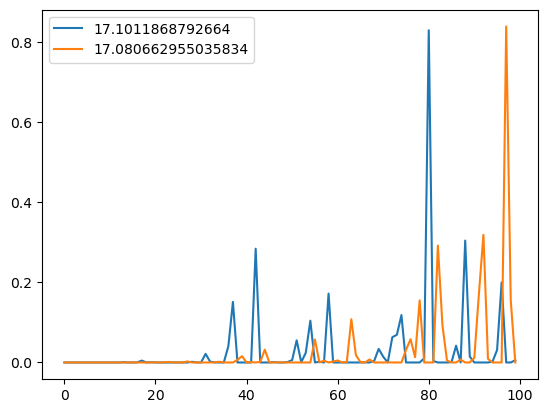

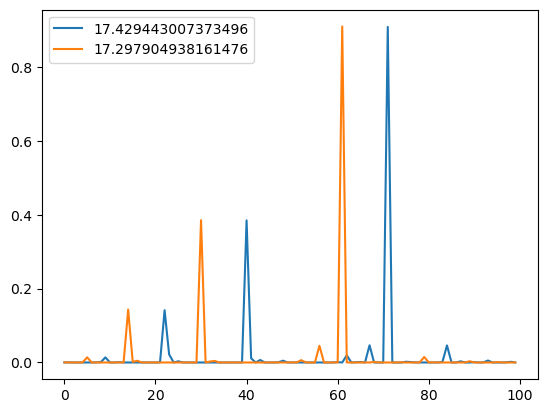

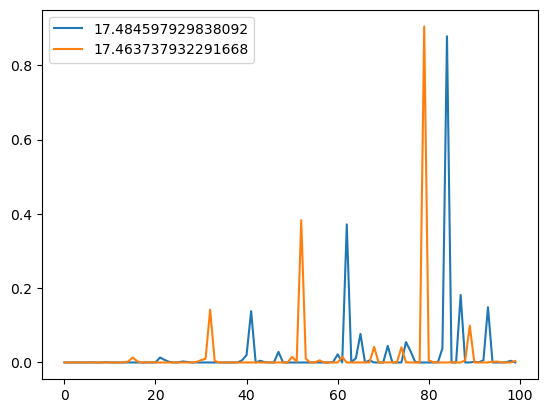

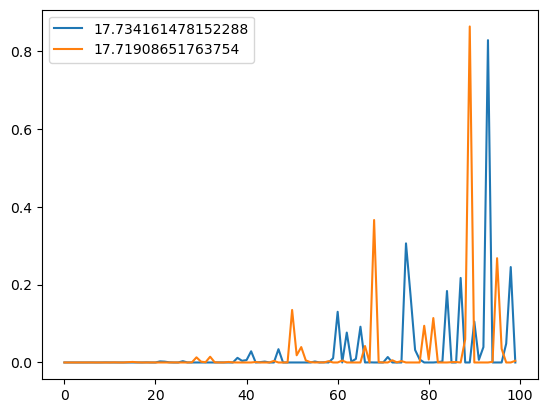

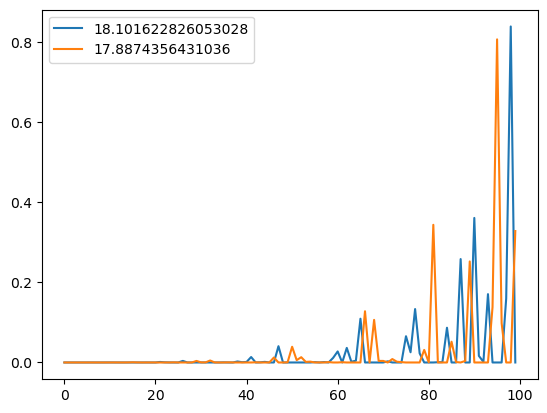

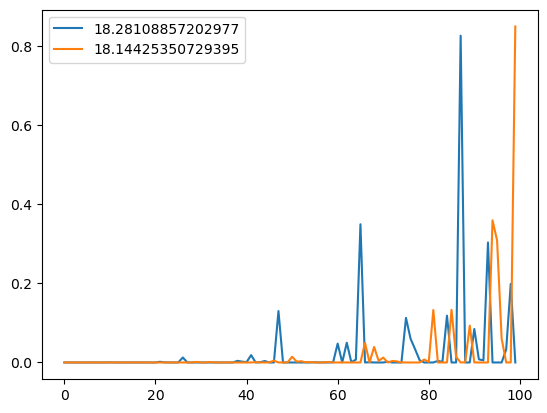

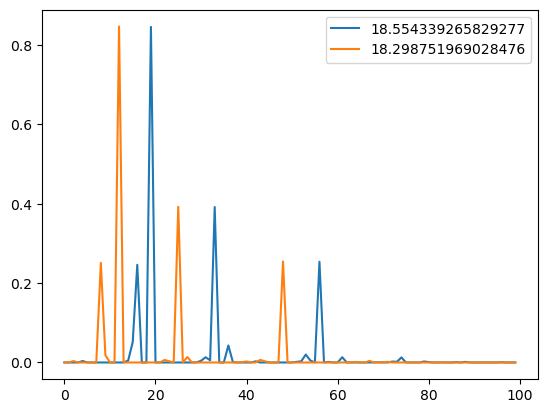

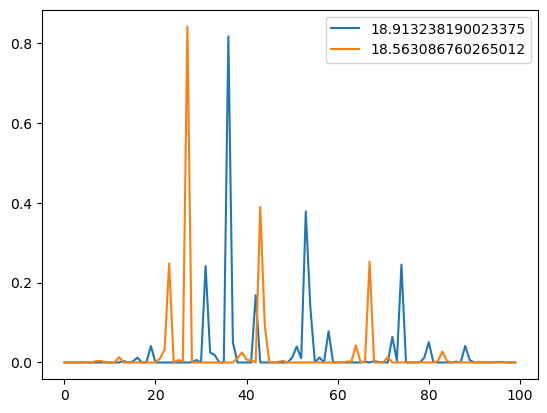

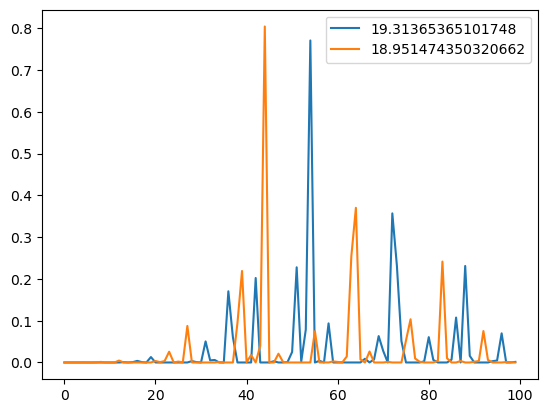

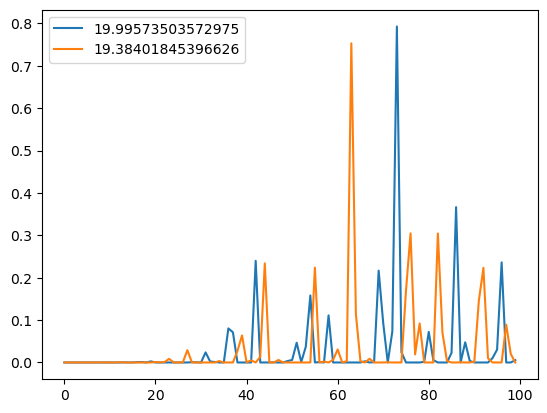

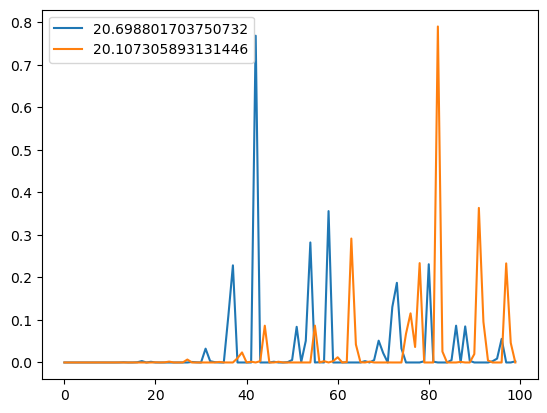

In [161]:
l = len(vec[0])
for i in range(int(len(vec)/2)):
    j = 2*i
    plt.plot(np.arange(l),np.absolute(vec[j+1]),label = '{}'.format(eig[j+1]))
    plt.plot(np.arange(l),np.absolute(vec[j]),label = '{}'.format(eig[j]))
    plt.legend()
    plt.show()

In [463]:
np.sqrt(8*Ec1*Ej1)-Ec1-eig[0]*2*u.J

<Quantity -5.27935002e-26 J>

In [513]:
f1 = eig[0]*2*u.J/c.h

In [514]:
f2 = eig[1]*2*u.J/c.h

In [515]:
f1-f2

<Quantity -4.76837158e-07 1 / s>

In [134]:
I1 = q.Qobj([[1,0],[0,0]])
I2 = q.Qobj([[0,0],[0,1]])

In [135]:
q.tensor(I1, q.create(N))

Quantum object: dims = [[2, 10], [2, 10]], shape = (20, 20), type = oper, isherm = False
Qobj data =
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [1.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         1.41421356 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         1.73205081 0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         2.         0.         0.
  0.         0.    

In [85]:
q.tensor( I2, q.create(N))

Quantum object: dims = [[2, 5], [2, 5]], shape = (10, 10), type = oper, isherm = False
Qobj data =
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         1.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  1.41421356 0.         0.         0.        ]
 [0.         0.         0.         0.        

In [77]:
q.identity(10)

Quantum object: dims = [[10], [10]], shape = (10, 10), type = oper, isherm = True
Qobj data =
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]

In [78]:
H = q.tensor(q.sigmaz(), 
             q.qeye(2)) + q.tensor(q.identity(2), q.sigmaz()) + 0.05 * q.tensor(q.sigmax(), q.sigmax())